# 다중선형회귀분석 - 변수선택법을 통한 다중회귀분석

In [5]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [6]:
# 현재경로 확인
os.getcwd()

'/Users/dakyunglee/python/ch6_regression_analysis'

In [7]:
# 데이터 불러오기
corolla = pd.read_csv("./data/ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [9]:
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 1436 nVar: 37


## 범주형 변수를 이진형 변수로 변환

In [13]:
corolla.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [10]:
# 가변수 생성
dummy_p = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)

In [11]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
# 연료타입에 대한 위치 인덱스를 저장  
p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Diesel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

In [15]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [16]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
dummy_p[p_idx] = 1  # Petrol
dummy_d[d_idx] = 1  # Diesel
dummy_c[c_idx] = 1  # CNG

In [17]:
dummy_d

array([1, 1, 1, ..., 0, 0, 0])

## 불필요한 변수 제거 및 가변수 추가


In [18]:
# np or dict to DF
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG': dummy_c})

# column slice
corolla_ = corolla.dropna().drop(['Id','Model','Fuel_Type'], axis=1, inplace=False)
mlr_data = pd.concat((corolla_, Fuel), 1)

In [19]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [20]:
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [21]:
# bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant='add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [22]:
feature_columns = list(mlr_data.columns.difference(['Price']))
X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [23]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [33]:
fitted_full_model.summary() ## R2가 높고, 대부분의 변수들이 유의

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     266.1
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:06:58   Log-Likelihood:                -8467.7
No. Observations:                1005   AIC:                         1.700e+04
Df Residuals:                     971   BIC:                         1.717e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -370.4908    144.114     -2.571      0.010    -653.301     -87.681
Age_08_04         -118.2936      4.198    -28.177      0.000    -126.532    -110.055
Airbag_1           130.0151    270.166      0.481      0.630    -400.161     660.191
Airbag_2           -35.7205    146.653     -0.244      0.808    -323.514     252.073
Airco              226.0878     96.779      2.336      0.020      36.167     416.009
Automatic          436.6641    167.321      2.610      0.009     108.311     765.017
Automatic_airco   2361.3272    204.494     11.547      0.000    1960.027    2762.628
BOVAG_Guarantee    530.8840    139.185      3.814      0.000     257.746     804.022
Backseat_Divider  -220.5390    139.645     -1.579      0.115    -494.580      53.502
Boardcomputer     -274.1695    126.739     -2.163      0.031    -522.884     -25.455
CD_Player          293.5778    105.452      2.784      0.005      86.637     500.518
CNG              -1194.3996    290.545     -4.111      0.000   -1764.569    -624.231
Central_Lock       -77.4989    154.635     -0.501      0.616    -380.956     225.958
Cylinders           -0.0321      0.002    -13.187      0.000      -0.037      -0.027
Diesel             218.8713    203.260      1.077      0.282    -180.008     617.751
Doors              117.6540     43.093      2.730      0.006      33.087     202.220
Gears              220.2574    247.627      0.889      0.374    -265.688     706.203
Guarantee_Period    71.1750     14.490      4.912      0.000      42.739      99.611
HP                  22.9765      3.798      6.050      0.000      15.524      30.429
KM                  -0.0166      0.001    -12.501      0.000      -0.019      -0.014
Met_Color           26.3881     82.134      0.321      0.748    -134.792     187.568
Metallic_Rim       168.6383    100.942      1.671      0.095     -29.452     366.729
Mfg_Month          -96.4316     10.796     -8.932      0.000    -117.618     -75.245
Mfg_Year             1.7902      0.912      1.962      0.050      -0.000       3.581
Mfr_Guarantee      172.9071     78.745      2.196      0.028      18.377     327.437
Mistlamps          -80.8364    116.682     -0.693      0.489    -309.814     148.142
Petrol             975.5203    226.509      4.307      0.000     531.017    1420.024
Power_Steering      68.6044    316.952      0.216      0.829    -553.385     690.594
Powered_Windows    424.2228    156.115      2.717      0.007     117.862     730.583
Quarterly_Tax       13.2767      1.977      6.714      0.000       9.396      17.157
Radio              444.8655    668.939      0.665      0.506    -867.868    1757.599
Radio_cassette    -621.4214    668.961     -0.929      0.353   -1934.197     691.355
Sport_Model        338.3420     93.501      3.619      0.000     154.854     521.830
Tow_Bar           -239.

## VIF를 통한 다중공선성 확인 

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


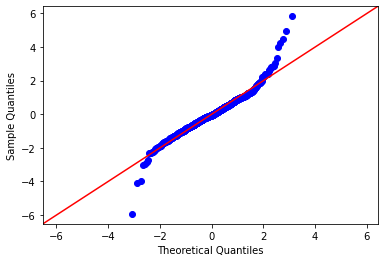

In [26]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid  # residual
pred_y=fitted_full_model.predict(train_x)
# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

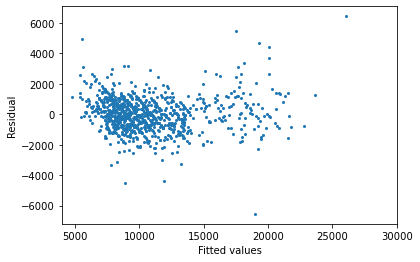

In [27]:
# residual pattern 확인
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [28]:
pred_y=fitted_full_model.predict(test_x) ## 검증 데이터에 대한 예측 

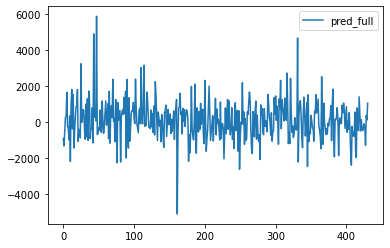

In [29]:
plt.plot(np.array(test_y-pred_y),label="pred_full")
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error

In [35]:
 mean_squared_error(y_true= test_y, y_pred= pred_y)

1219149.0041264743

## 변수선택법

In [36]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe18ac98f40>, 'AIC': 19048.31374395659}


In [37]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fe18ac85940>,
 'AIC': 17003.309958783793}

In [38]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 1.9559102058410645 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17531.4
Name: 211, dtype: object


In [39]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [40]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  36 models on 1 predictors in 0.17128682136535645 seconds.
Processed  630 models on 2 predictors in 1.6797230243682861 seconds.
Processed  7140 models on 3 predictors in 14.871631860733032 seconds.
Total elapsed time: 17.05429196357727 seconds.


In [41]:
models

,AIC,model
1,17746.095476,<statsmodels.regression.linear_model.Regressio...
2,17531.443900,<statsmodels.regression.linear_model.Regressio...
3,17384.637773,<statsmodels.regression.linear_model.Regressio...


In [42]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1826.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:12:56   Log-Likelihood:                -8688.3
No. Observations:                1005   AIC:                         1.738e+04
Df Residuals:                    1001   BIC:                         1.740e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0225      0.001    -16.641      0.000      -0.025      -0.020
Mfg_Year    1509.5249     37.787     39.949      0.000    1435.375    1583.675
Weight        16.0823      0.968     16.622      0.000      14.184      17.981
const      -3.023e+06   7.51e+04    -40.262      0.000   -3.17e+06   -2.88e+06
==============================================================================
Omnibus:                      168.486   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1820.085
Skew:                          -0.397   Prob(JB):                         0.00
Kurtosis:                       9.545   Cond. No.                     1.36e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.90042
full model AIC:  17003.30996
full model MSE:  12249022.66253
selected model Rsquared:  0.84551
selected model AIC:  17384.63777
selected model MSE:  12249022.66253


Text(0, 0.5, 'BIC')

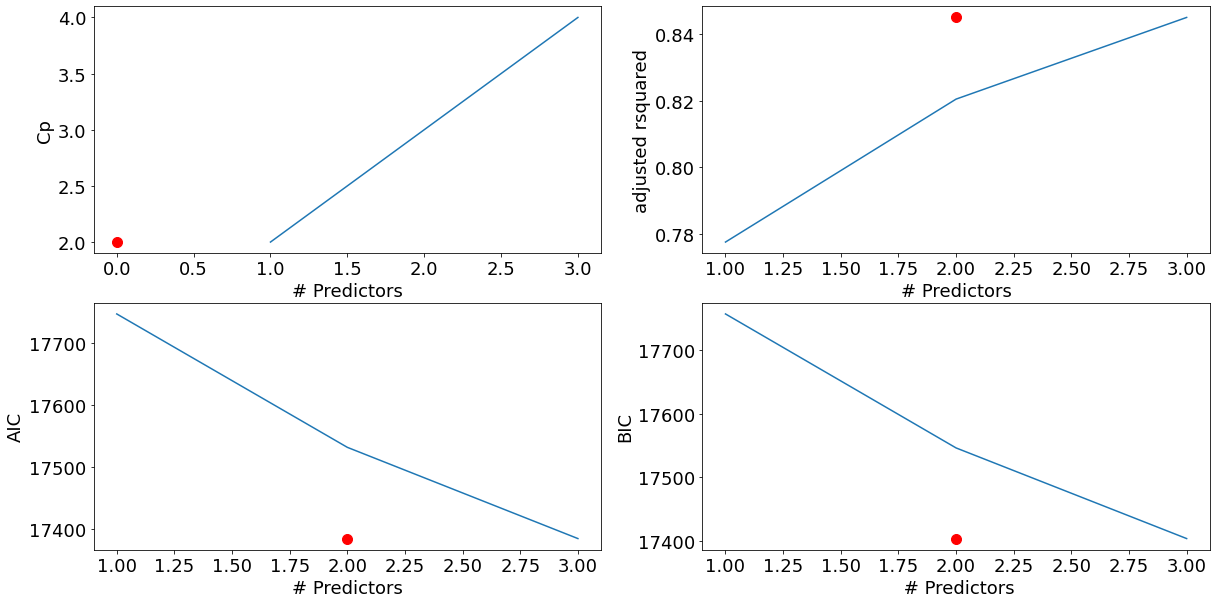

In [44]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [45]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [46]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [47]:
Forward_best_model = forward_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.17665386199951172
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe15d0b76a0>
Processed  35 models on 2 predictors in 0.066558837890625
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe15d0b7ca0>
Processed  34 models on 3 predictors in 0.06958198547363281
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe15d0b7400>
Processed  33 models on 4 predictors in 0.11998701095581055
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe15d0b5d30>
Processed  32 models on 5 predictors in 0.08179616928100586
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 

In [49]:
Forward_best_model.aic

16989.1691692764

In [50]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     367.6
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:17:18   Log-Likelihood:                -8469.6
No. Observations:                1005   AIC:                         1.699e+04
Df Residuals:                     980   BIC:                         1.711e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1427.0580     49.466     28.849      0.000    1329.987    1524.129
Automatic_airco   2300.5069    192.855     11.929      0.000    1922.051    2678.963
KM                  -0.0165      0.001    -12.597      0.000      -0.019      -0.014
Weight               7.9376      1.270      6.251      0.000       5.446      10.429
HP                  23.3165      3.660      6.370      0.000      16.134      30.499
Powered_Windows    355.5937     89.584      3.969      0.000     179.795     531.393
Quarterly_Tax       13.1168      1.922      6.824      0.000       9.345      16.889
Guarantee_Period    71.8016     14.309      5.018      0.000      43.722      99.881
BOVAG_Guarantee    550.8290    137.447      4.008      0.000     281.105     820.552
Petrol             758.3686    310.037      2.446      0.015     149.955    1366.782
Sport_Model        360.5243     90.848      3.968      0.000     182.245     538.804
CD_Player          290.3910    102.680      2.828      0.005      88.892     491.890
Tow_Bar           -226.2881     83.240     -2.719      0.007    -389.637     -62.939
ABS               -385.2970    109.524     -3.518      0.000    -600.227    -170.368
Airco              206.1336     92.731      2.223      0.026      24.159     388.108
CNG              -1385.6838    442.546     -3.131      0.002   -2254.131    -517.237
Doors              109.7204     42.068      2.608      0.009      27.167     192.274
Automatic          402.5795    164.533      2.447      0.015      79.701     725.458
Boardcomputer     -280.6940    125.292     -2.240      0.025    -526.565     -34.823
Mfr_Guarantee      174.9048     77.771      2.249      0.025      22.289     327.521
Mfg_Month           22.4483     10.777      2.083      0.038       1.299      43.598
Metallic_Rim       166.4444     94.590      1.760      0.079     -19.177     352.066
Backseat_Divider  -232.1731    125.291     -1.853      0.064    -478.042      13.696
Radio_cassette    -172.3628    109.415     -1.575      0.116    -387.077      42.351
Cylinders         -6.72e+05   2.32e+04    -28.964      0.000   -7.17e+05   -6.26e+05
const             -1.68e+05   5799.977    -28.964      0.000   -1.79e+05   -1.57e+05
==============================================================================
Omnibus:                      111.192   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              636.554
Skew:                           0.313   Prob(JB):                    5.94e-139
Kurtosis:                       6.848   Cond. No.                     1.14e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.75e-20. Thi

# 후진소거법

In [51]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [56]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [57]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.1785898208618164
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe15d0a9880>
Processed  35 models on 34 predictors in 0.21008682250976562
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mf

In [58]:
Backward_best_model.aic

16989.169169276443

# 단계적 선택법

In [59]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [60]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.12481689453125
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe15d0f8340>
forward
Processed  1 models on 0 predictors in 0.004357099533081055
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe15d0d91c0>
Processed  35 models on 2 predictors in 0.17772889137268066
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe15d0f8700>
forward
Processed  2 models on 1 predictors in 0.012061834335327148
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe1546cfbb0>
Processed  34 models on 3 predictors in 0.14907193183898926
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrap

Processed  15 models on 14 predictors in 0.08603525161743164
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'Petrol', 'Sport_Model', 'CD_Player', 'ABS', 'Airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe15d0854f0>
Processed  21 models on 16 predictors in 0.0731058120727539
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'Petrol', 'Sport_Model', 'CD_Player', 'Tow_Bar', 'ABS', 'Airco', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe15d0f8bb0>
forward
Processed  16 models on 15 predictors in 0.042298078536987305
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'Petrol', 'Sport_Model', 'C

Processed  11 models on 26 predictors in 0.05833792686462402
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'Petrol', 'Sport_Model', 'CD_Player', 'Tow_Bar', 'ABS', 'Airco', 'CNG', 'Doors', 'Automatic', 'Boardcomputer', 'Mfr_Guarantee', 'Mfg_Month', 'Metallic_Rim', 'Backseat_Divider', 'Radio_cassette', 'Cylinders', 'Age_08_04', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe15d0d9160>
forward
Processed  26 models on 25 predictors in 0.12770795822143555
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'Petrol', 'Sport_Model', 'CD_Player', 'Tow_Bar', 'ABS', 'Airco', 'CNG', 'Doors', 'Automatic', 'Boardcomputer', 'Mfr_Guarantee', 'Mfg_Month', 'Metallic_Rim', 'Backseat_Divider', 'Radio_cassette', 'Cylinders', 'const']  AIC: <statsmodels.regression

Processed  11 models on 26 predictors in 0.06185603141784668
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'Petrol', 'Sport_Model', 'CD_Player', 'Tow_Bar', 'ABS', 'Airco', 'CNG', 'Doors', 'Automatic', 'Boardcomputer', 'Mfr_Guarantee', 'Mfg_Month', 'Metallic_Rim', 'Backseat_Divider', 'Radio_cassette', 'Cylinders', 'Age_08_04', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe15d0d93a0>
forward
Processed  26 models on 25 predictors in 0.09894394874572754
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'Petrol', 'Sport_Model', 'CD_Player', 'Tow_Bar', 'ABS', 'Airco', 'CNG', 'Doors', 'Automatic', 'Boardcomputer', 'Mfr_Guarantee', 'Mfg_Month', 'Metallic_Rim', 'Backseat_Divider', 'Radio_cassette', 'Cylinders', 'const']  AIC: <statsmodels.regression

In [61]:
Stepwise_best_model.aic

16989.1691692764

# 성능평가 

In [64]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(26,) (26,) (26,)


In [65]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [66]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [67]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [68]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   1.21915e+06  1.21964e+06  1.21964e+06  1.21964e+06
RMSE      1104.15      1104.37      1104.37      1104.37
MAE       820.349      819.689      819.689      819.689
MAPE      7.96032      7.95169      7.95169      7.95169


In [69]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
26
26
26


In [70]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     266.1
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:22:49   Log-Likelihood:                -8467.7
No. Observations:                1005   AIC:                         1.700e+04
Df Residuals:                     971   BIC:                         1.717e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -370.4908    144.114     -2.571      0.010    -653.301     -87.681
Age_08_04         -118.2936      4.198    -28.177      0.000    -126.532    -110.055
Airbag_1           130.0151    270.166      0.481      0.630    -400.161     660.191
Airbag_2           -35.7205    146.653     -0.244      0.808    -323.514     252.073
Airco              226.0878     96.779      2.336      0.020      36.167     416.009
Automatic          436.6641    167.321      2.610      0.009     108.311     765.017
Automatic_airco   2361.3272    204.494     11.547      0.000    1960.027    2762.628
BOVAG_Guarantee    530.8840    139.185      3.814      0.000     257.746     804.022
Backseat_Divider  -220.5390    139.645     -1.579      0.115    -494.580      53.502
Boardcomputer     -274.1695    126.739     -2.163      0.031    -522.884     -25.455
CD_Player          293.5778    105.452      2.784      0.005      86.637     500.518
CNG              -1194.3996    290.545     -4.111      0.000   -1764.569    -624.231
Central_Lock       -77.4989    154.635     -0.501      0.616    -380.956     225.958
Cylinders           -0.0321      0.002    -13.187      0.000      -0.037      -0.027
Diesel             218.8713    203.260      1.077      0.282    -180.008     617.751
Doors              117.6540     43.093      2.730      0.006      33.087     202.220
Gears              220.2574    247.627      0.889      0.374    -265.688     706.203
Guarantee_Period    71.1750     14.490      4.912      0.000      42.739      99.611
HP                  22.9765      3.798      6.050      0.000      15.524      30.429
KM                  -0.0166      0.001    -12.501      0.000      -0.019      -0.014
Met_Color           26.3881     82.134      0.321      0.748    -134.792     187.568
Metallic_Rim       168.6383    100.942      1.671      0.095     -29.452     366.729
Mfg_Month          -96.4316     10.796     -8.932      0.000    -117.618     -75.245
Mfg_Year             1.7902      0.912      1.962      0.050      -0.000       3.581
Mfr_Guarantee      172.9071     78.745      2.196      0.028      18.377     327.437
Mistlamps          -80.8364    116.682     -0.693      0.489    -309.814     148.142
Petrol             975.5203    226.509      4.307      0.000     531.017    1420.024
Power_Steering      68.6044    316.952      0.216      0.829    -553.385     690.594
Powered_Windows    424.2228    156.115      2.717      0.007     117.862     730.583
Quarterly_Tax       13.2767      1.977      6.714      0.000       9.396      17.157
Radio              444.8655    668.939      0.665      0.506    -867.868    1757.599
Radio_cassette    -621.4214    668.961     -0.929      0.353   -1934.197     691.355
Sport_Model        338.3420     93.501      3.619      0.000     154.854     521.830
Tow_Bar           -239.

In [71]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     367.6
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:22:52   Log-Likelihood:                -8469.6
No. Observations:                1005   AIC:                         1.699e+04
Df Residuals:                     980   BIC:                         1.711e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1427.0580     49.466     28.849      0.000    1329.987    1524.129
Automatic_airco   2300.5069    192.855     11.929      0.000    1922.051    2678.963
KM                  -0.0165      0.001    -12.597      0.000      -0.019      -0.014
Weight               7.9376      1.270      6.251      0.000       5.446      10.429
HP                  23.3165      3.660      6.370      0.000      16.134      30.499
Powered_Windows    355.5937     89.584      3.969      0.000     179.795     531.393
Quarterly_Tax       13.1168      1.922      6.824      0.000       9.345      16.889
Guarantee_Period    71.8016     14.309      5.018      0.000      43.722      99.881
BOVAG_Guarantee    550.8290    137.447      4.008      0.000     281.105     820.552
Petrol             758.3686    310.037      2.446      0.015     149.955    1366.782
Sport_Model        360.5243     90.848      3.968      0.000     182.245     538.804
CD_Player          290.3910    102.680      2.828      0.005      88.892     491.890
Tow_Bar           -226.2881     83.240     -2.719      0.007    -389.637     -62.939
ABS               -385.2970    109.524     -3.518      0.000    -600.227    -170.368
Airco              206.1336     92.731      2.223      0.026      24.159     388.108
CNG              -1385.6838    442.546     -3.131      0.002   -2254.131    -517.237
Doors              109.7204     42.068      2.608      0.009      27.167     192.274
Automatic          402.5795    164.533      2.447      0.015      79.701     725.458
Boardcomputer     -280.6940    125.292     -2.240      0.025    -526.565     -34.823
Mfr_Guarantee      174.9048     77.771      2.249      0.025      22.289     327.521
Mfg_Month           22.4483     10.777      2.083      0.038       1.299      43.598
Metallic_Rim       166.4444     94.590      1.760      0.079     -19.177     352.066
Backseat_Divider  -232.1731    125.291     -1.853      0.064    -478.042      13.696
Radio_cassette    -172.3628    109.415     -1.575      0.116    -387.077      42.351
Cylinders         -6.72e+05   2.32e+04    -28.964      0.000   -7.17e+05   -6.26e+05
const             -1.68e+05   5799.977    -28.964      0.000   -1.79e+05   -1.57e+05
==============================================================================
Omnibus:                      111.192   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              636.554
Skew:                           0.313   Prob(JB):                    5.94e-139
Kurtosis:                       6.848   Cond. No.                     1.14e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.75e-20. Thi